### [최저가 주유소, 오피넷]
- 오피넷 (API 권장함) 
- 클릭 화면 및 xpath등을 활용하기 위하여 체택한 사이트임
- 동적 크롤링 및 셀리니움, 크롬드라이버에 대하여 미리 조사하세요

## [실행내용]
- 이코드를 실행하면 크롬드라이버가 실행되면서
- url='https://www.opinet.co.kr/' 화면이 크롬드라이버 띄워지고
- driver.get(url) 로 사이트를 읽어서
-  driver.get('https://www.opinet.co.kr/searRgSelect.do') # 지역별 유류비 사이트 이동 하고
- 부산, 동래구를 지정하여 엑셀다운로드를 준비하여 사용자가 클릭하면 엑셀자료를 다운로드 함

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys # 키보드 키사용

# 처음보는 작업임. driver.find_element_by_id를
# driver.find_element(By.ID )로 작업할수 있음.  이 노트차으이 19,20번 확인
from selenium.webdriver.common.by import By   
import time

url='https://www.opinet.co.kr/'

driver=webdriver.Chrome() # 크롬 드라이브 본인폴더로 이동

driver.get(url)  # 기본 오피넷 사이트 이동
time.sleep(2)

driver.get('https://www.opinet.co.kr/searRgSelect.do') # 지역별 유류비 사이트 이동
time.sleep(5)

sido=driver.find_element(By.ID,"SIDO_NM0") # 지역 대분류 선택, 아래와 같이 작업해도 됨
                                           # sido=driver.find_element_by_id("SIDO_NM0") # 교재 181쪽
sido.send_keys('부산')   # 대분류 부산으로 입력
time.sleep(3)

sido=driver.find_element(By.ID,"SIGUNGU_NM0") # 소분류 선택

sido.send_keys('동래구') # 소분류로 동래구 입력
time.sleep(3)


driver.find_element(By.XPATH,'//*[@id="glopopd_excel"]').click() # 엑셀 저장버튼 클릭
driver.close

<bound method WebDriver.close of <selenium.webdriver.chrome.webdriver.WebDriver (session="3c713a9758911845fc450550b90ace76")>>

## [최저가 주유가격 찾기]
- 이러한 작업은 본인의 위치정보서비스를 사용해서 위경도 값이 나온다면
- 그 위치정보서비스와 가장 가까운 곳의 주유소 중 최저가 주유소 찾기로 변경도 가능함.

In [4]:
import re
def remove(x):
    x=re.sub('\t','',x)
    x=re.sub('\n','',x)
    return x

def print_result(x0,x1,x2,x3,x4,x5):
    print('---------------------------------')
    print('날짜:',x0)
    print('구분:' ,x1)
    print('주유소명:',x2)
    print('가격:', x3)
    print('주소:', x4)
    print('전화번호:',x5)

▶고급휘발유/보통휘발유/경유/실내등유의 tbody값의 id속석값을 이용하여서 이름과 가격을 가져올수 있음.
- print(soup.find('tbody',id='body2').prettify())
- name=soup.find('tbody',id='body2').find('a').get_text()
- name
- remove(name)

- 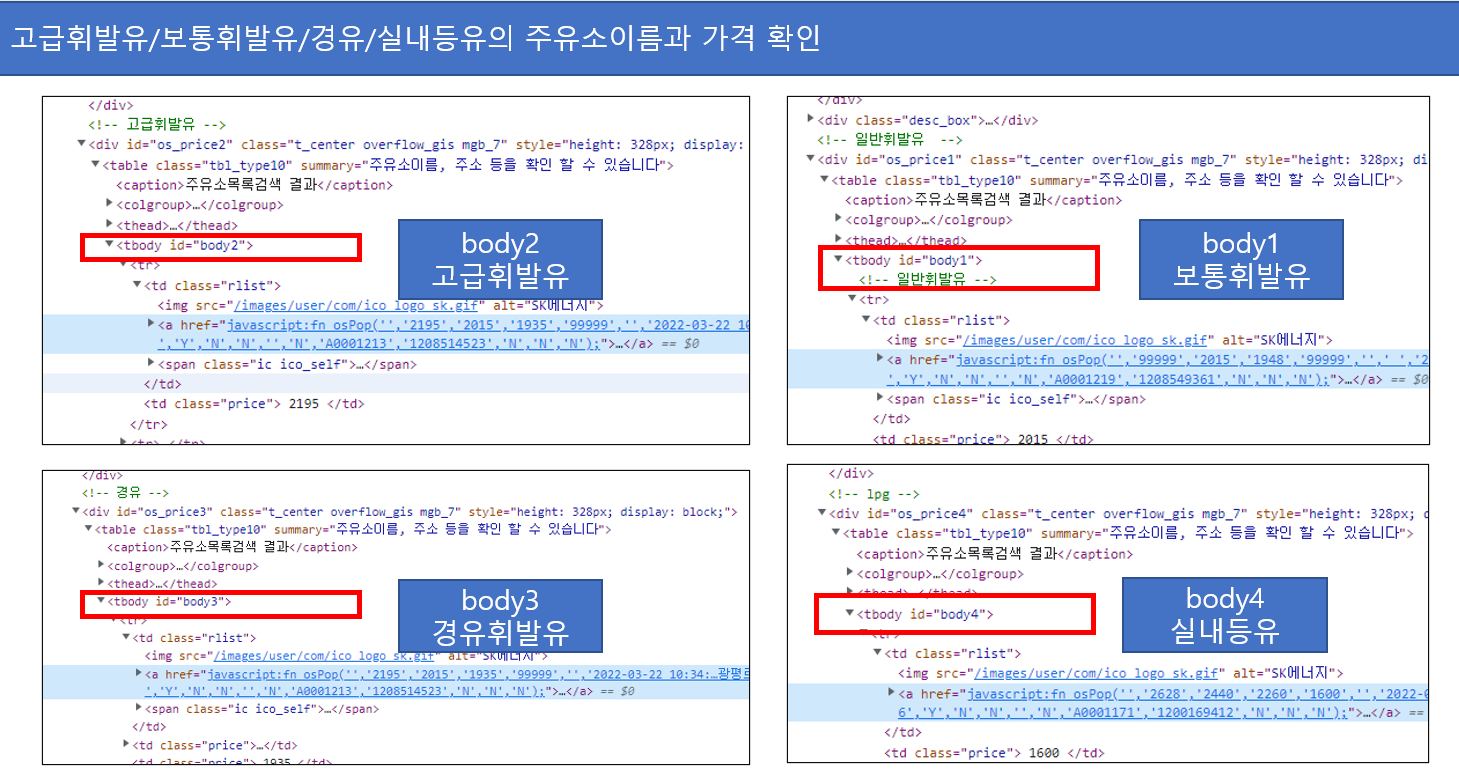

In [4]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup

url='https://www.opinet.co.kr/'

driver=webdriver.Chrome()


driver.get(url)  # 기본 오피넷 사이트 이동
time.sleep(2)
driver.get('https://www.opinet.co.kr/searRgSelect.do') # 지역별 유류비 사이트 이동
time.sleep(5)
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')

In [6]:
# 샘플 자료 고급휘발유
# bodyNum이 1일때는 보통휘발유, 2는 고급휘발유, 3은 경유, 4는실내등유

import re
bodyNum=2
base=soup.find('tbody',id='body'+str(bodyNum))

name=base.find('a').get_text()
price=base.find('td','price').get_text()
oil_company=base.find('img')['alt']


name=remove(name)
price=remove(price)
name,price,oil_company

('지에스칼텍스(주)...', '1724', 'GS칼텍스')

In [7]:
# 완성1과 완성2 모두 같은 결과임. 
#######################################################
########### 완성본   보통,고급,경유,실내등유의 가장 저렴한 가격과 상호, 상표확인
#######################################################

gubun_List=['고급휘발유','보통휘발유','경유','실내등유']
bodyNum=['body2','body1','body3','body4']
for x in range(4):

    base=soup.find('tbody',id=bodyNum[x])

    name=base.find('a').get_text()
    price=base.find('td','price').get_text()
    oil_company=base.find('img')['alt']

    name=remove(name) ;   price=remove(price)
    print('▶' + gubun_List[x],"=>", name,price, oil_company)

▶고급휘발유 => 지에스칼텍스(주)... 1724 GS칼텍스
▶보통휘발유 => ㈜경남석유 갤러리... 1474 S-OIL
▶경유 => 봉곡주유소 1474 GS칼텍스
▶실내등유 => 대양주유소 1225 GS칼텍스


In [9]:
#완성2
#######################################################
########### 완성본   보통,고급,경유,실내등유의 가장 저렴한 가격과 상호, 상표확인
#######################################################

gubun_List=['보통휘발유','고급휘발유','경유','실내등유']
for bodyNum in range(1,5):

    base=soup.find('tbody',id='body'+str(bodyNum))

    name=base.find('a').get_text()
    price=base.find('td','price').get_text()
    oil_company=base.find('img')['alt']

    name=remove(name) ;   price=remove(price)
    print('▶' + gubun_List[bodyNum-1],"=>", name,price, oil_company)
driver.close() # 크롬드라이버 종료

▶보통휘발유 => ㈜경남석유 갤러리... 1474 S-OIL
▶고급휘발유 => 지에스칼텍스(주)... 1724 GS칼텍스
▶경유 => 봉곡주유소 1474 GS칼텍스
▶실내등유 => 대양주유소 1225 GS칼텍스


# [실행작업] 전화번호와 주소를 얻으려고 함. 이 사이트는 클릭해서 세부정보를 얻을수 있음.
- 클릭을 한뒤 그 사이트를 drive로 갖고와야함. 
- 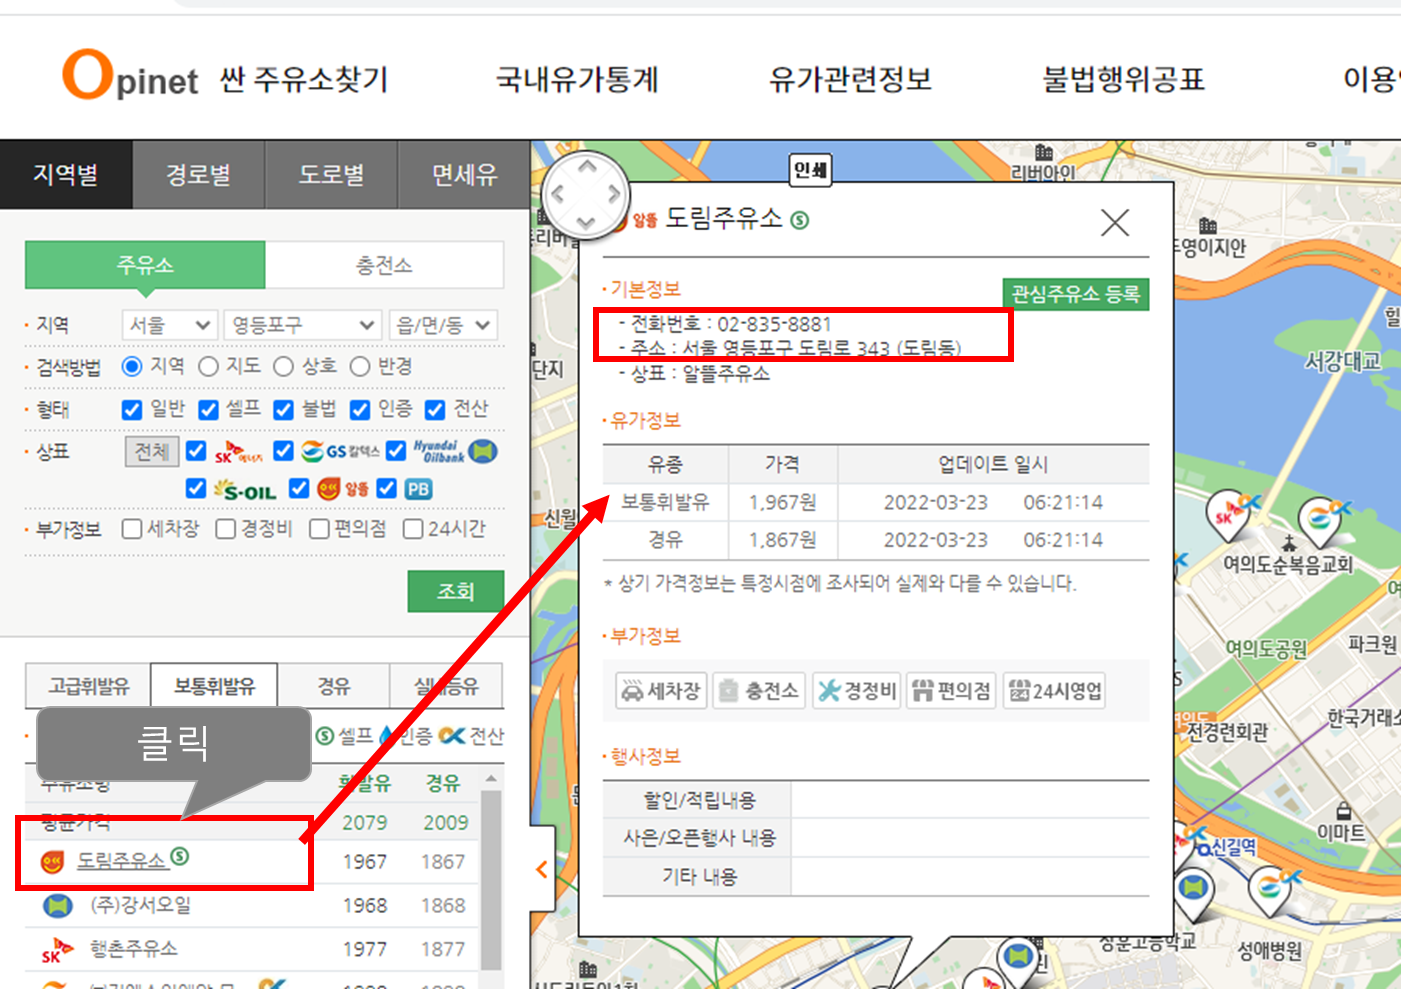

In [11]:
from bs4 import BeautifulSoup
from selenium import webdriver
import time

url='https://www.opinet.co.kr/'

driver=webdriver.Chrome() 


driver.get(url)  # 기본 오피넷 사이트 이동
time.sleep(2)

driver.get('https://www.opinet.co.kr/searRgSelect.do') # 지역별 유류비 사이트 이동
time.sleep(5)

html = driver.page_source
soup = BeautifulSoup(html,'html.parser')

driver.close()

### [미리 알기] XPath에 대해 알아봅니다.
- https://www.fun-coding.org/post/crawl_advance5.html#gsc.tab=0

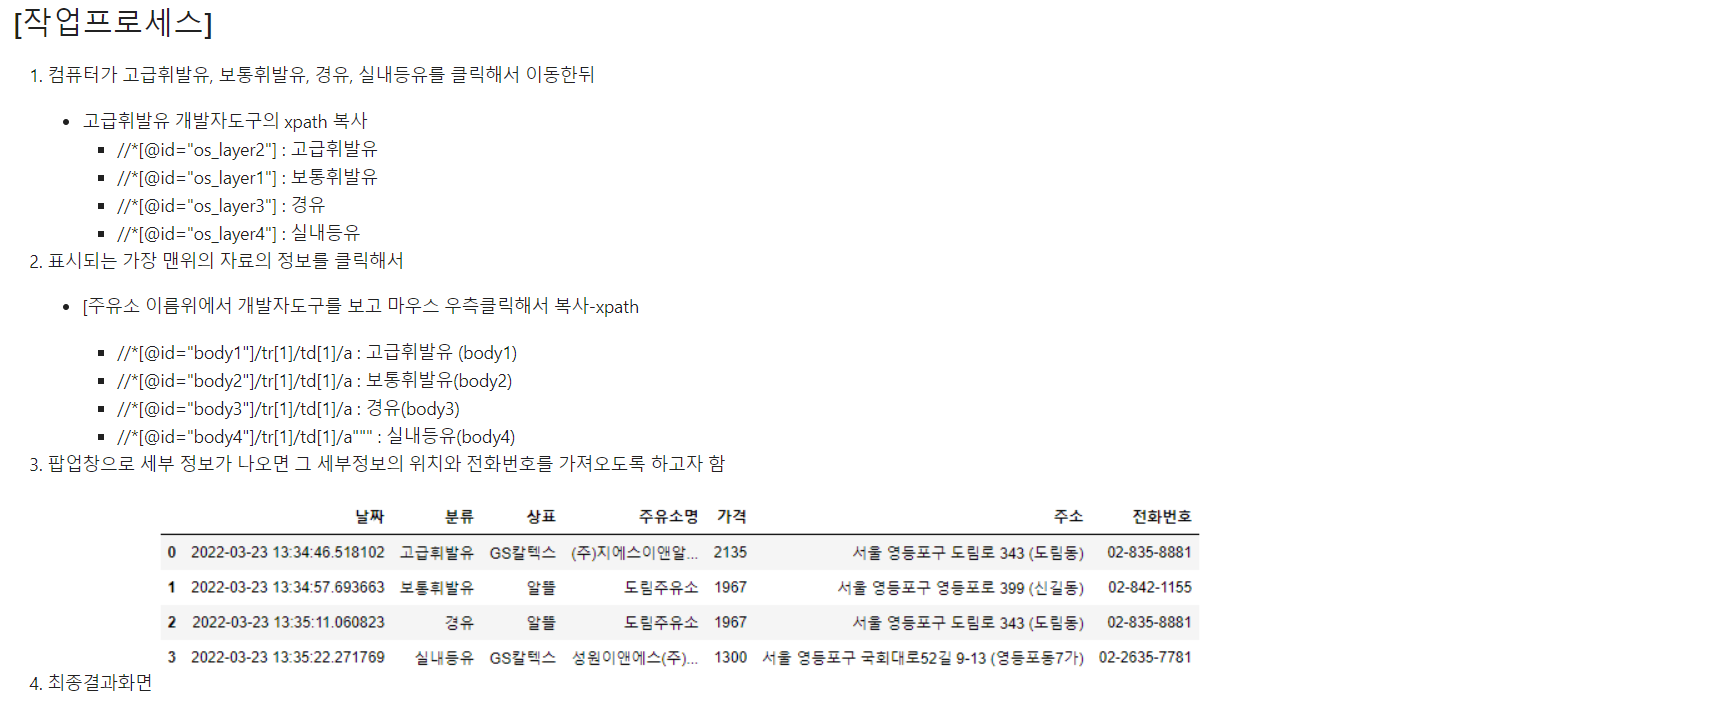

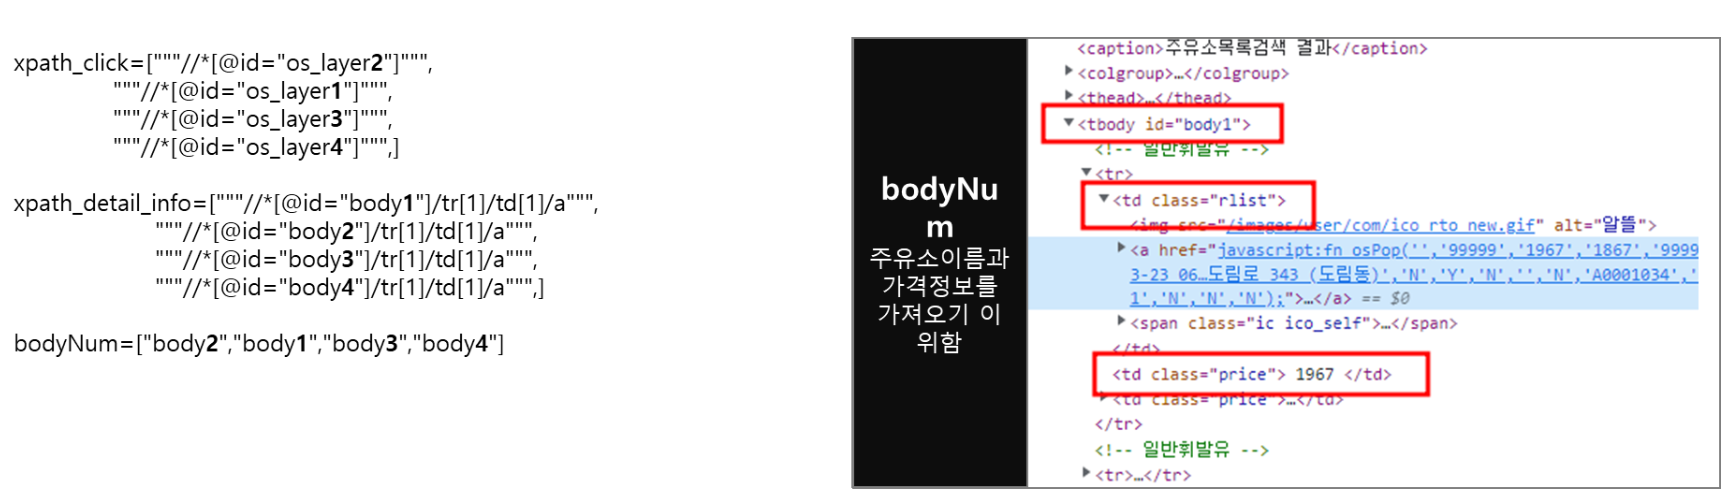

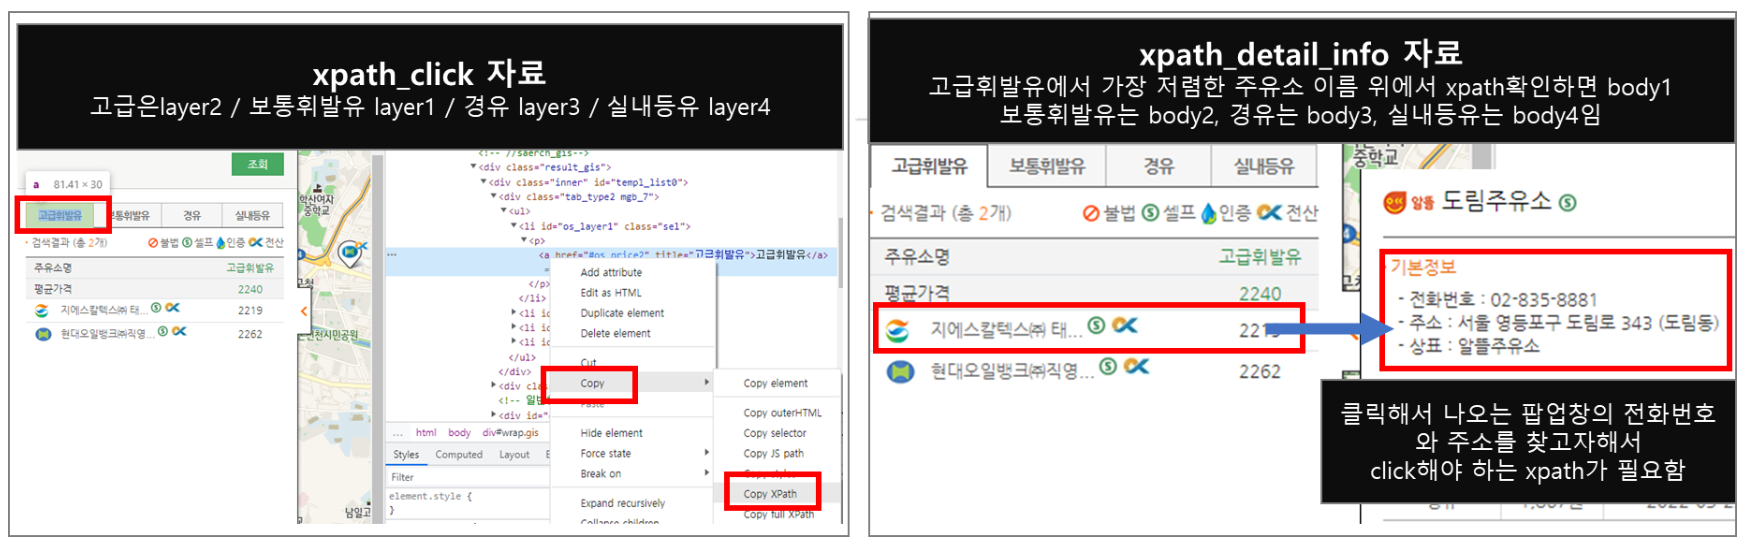

In [18]:
#################################################################################
#################################################################################
##   한개만 실행해보기
##
####################################################################################

from bs4 import BeautifulSoup
from selenium import webdriver
import time


xpath_click=["""//*[@id="os_layer2"]""",    #고급휘발유 탭을 클릭하는 정보를 갖고있는 xpath
            """//*[@id="os_layer1"]""",
            """//*[@id="os_layer3"]""",
            """//*[@id="os_layer4"]""",]

xpath_detail_info=["""//*[@id="body1"]/tr[1]/td[1]/a""",  #고급휘발유에 나온 첫번째 상호를 클릭해서 세부정보를 볼수 있도록 하는 xpath
                 """//*[@id="body2"]/tr[1]/td[1]/a""", 
                 """//*[@id="body3"]/tr[1]/td[1]/a""",
                 """//*[@id="body4"]/tr[1]/td[1]/a""",]

bodyNum=["body2","body1","body3","body4"]  # 고급휘발유에 첫번째 상호의 이름과, 가격을 볼수 있는 tbody의 태그값
gubun_List=['고급휘발유','보통휘발유','경유','실내등유']



url='https://www.opinet.co.kr/'
driver=webdriver.Chrome() 
driver.get(url)  # 기본 오피넷 사이트 이동
time.sleep(2)

driver.get('https://www.opinet.co.kr/searRgSelect.do') # 지역별 유류비 사이트 이동
time.sleep(5)
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')


# 고급휘발유 자료를 보고자함.
x=1 

# 이작업은 가격과 상표, 상호를 얻고자 하는것인데 이 페이지의 구조상 탭을 이동하지 않아도 정보를 얻을수 있음.
base=soup.find('tbody',id=bodyNum[x])

name=base.find('a').get_text()
price=base.find('td','price').get_text()
oil_company=base.find('img')['alt']
name=remove(name) ;   price=remove(price)
print('▶' + gubun_List[x],"=>", name,price, oil_company)   


# 고급휘발유 탭을 클릭하여서 이동
from selenium.webdriver.common.by import By

element = driver.find_element(By.XPATH, xpath_click[x])
element.click()

time.sleep(3)

## 가장 맨 위의 주유소 이름에서 클릭
element = driver.find_element(By.XPATH, xpath_click[x])
element.click()
time.sleep(3)

# 세부정보 팝업창자료에서 필요한 정보를 찾음
html = driver.page_source                   
soup = BeautifulSoup(html,'html.parser')

try:
    juso_element = soup.find('label', id='rd_addr')
    if juso_element:
        juso = juso_element.text
    else:
        juso = "주소 정보 없음"

    phone_element = soup.find('label', id='phn_no')
    if phone_element:
        phone = phone_element.text
    else:
        phone = "전화번호 정보 없음"

except AttributeError as e:
    print(f"Error: {e}")
    # 예외가 발생하면 여기에 예외 처리 코드를 추가하거나 패스할 수 있음

print(juso,phone)

▶보통휘발유 => 세기상사㈜ 서진주... 1474 S-OIL
주소 정보 없음 전화번호 정보 없음


### [최종작업하고자 하는 결과]
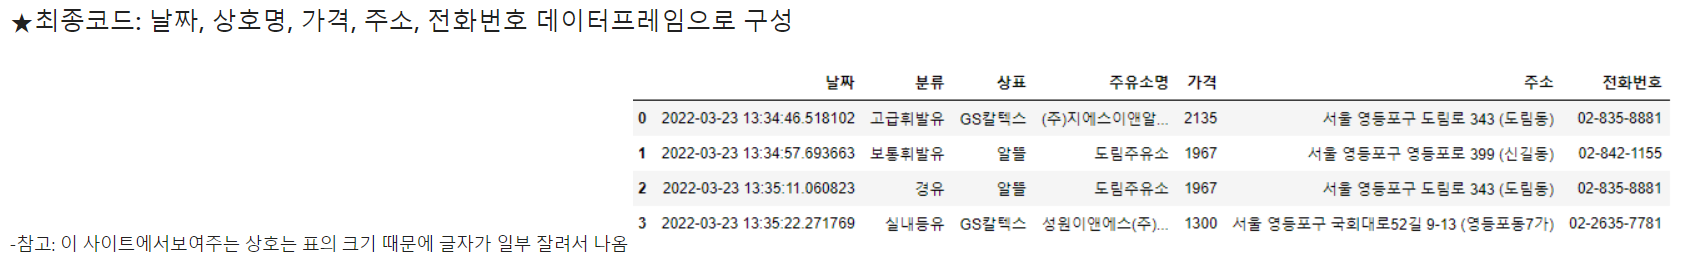

In [5]:
import re
def remove(x):
    x=re.sub('\t','',x)
    x=re.sub('\n','',x)
    return x

def print_result(x0,x1,x2,x3,x4,x5):
    print('---------------------------------')
    print('날짜:',x0)
    print('구분:' ,x1)
    print('주유소명:',x2)
    print('가격:', x3)
    print('주소:', x4)
    print('전화번호:',x5)

In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from datetime import datetime
import pandas as pd
import time


url='https://www.opinet.co.kr/'
driver=webdriver.Chrome() 
driver.get(url)  # 기본 오피넷 사이트 이동
time.sleep(2)
driver.get('https://www.opinet.co.kr/searRgSelect.do') # 지역별 유류비 사이트 이동
time.sleep(5)
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')

In [6]:
list_data=[]
gubun_List=['고급휘발유','보통휘발유','경유','실내등유']

#xpath_clik는 고급,보통,경유,실내등유를 클릭할때의 레이어 이름임
xpath_click=["""//*[@id="os_layer2"]""",
            """//*[@id="os_layer1"]""",
            """//*[@id="os_layer3"]""",
            """//*[@id="os_layer4"]""",]

# xpath_detail은 세부정보가 나오는 항목임 
xpath_detail_info=["""//*[@id="body1"]/tr[1]/td[1]/a""",
                 """//*[@id="body2"]/tr[1]/td[1]/a""",
                 """//*[@id="body3"]/tr[1]/td[1]/a""",
                 """//*[@id="body4"]/tr[1]/td[1]/a""",]
bodyNum=["body2","body1","body3","body4"]

for x in range(0,4):
    
    print('\n------' , datetime.now() ,' ---------------')
    base=soup.find('tbody',id=bodyNum[x])

    name=base.find('a').get_text()
    price=base.find('td','price').get_text()
    oil_company=base.find('img')['alt']

    name=remove(name) ;   price=remove(price)
    print('▶' + gubun_List[x],"=>", name,price, oil_company)
    
    
    # 고급휘발유 탭을 클릭하여서 이동
    from selenium.webdriver.common.by import By
    element = driver.find_element(By.XPATH, xpath_click[x])
    element.click()

    time.sleep(3)

    ## 가장 맨 위의 주유소 이름에서 클릭
    element = driver.find_element(By.XPATH, xpath_click[x])
    element.click()
    time.sleep(3)
    ##################################################################

   
    html = driver.page_source                    #띄워진 장에서 소스를 얻음
    soup = BeautifulSoup(html,'html.parser')
    try:
        juso_element = soup.find('label', id='rd_addr')
        if juso_element:
            juso = juso_element.text
        else:
            juso = "주소 정보 없음"

        phone_element = soup.find('label', id='phn_no')
        if phone_element:
            phone = phone_element.text
        else:
            phone = "전화번호 정보 없음"

    except AttributeError as e:
        pass
   
    list_data.append({'날짜':datetime.now(),
                      '분류':gubun_List[x],
                         '상표':oil_company,
                         '주유소명':name,
                         '가격':price,
                         '주소':juso,
                         '전화번호':phone})


------ 2024-01-19 07:01:51.602401  ---------------
▶고급휘발유 => 지에스칼텍스(주)... 1724 GS칼텍스

------ 2024-01-19 07:01:57.887416  ---------------
▶보통휘발유 => 세기상사㈜ 서진주... 1474 S-OIL

------ 2024-01-19 07:02:04.195126  ---------------
▶경유 => 세기상사㈜ 서진주... 1474 S-OIL

------ 2024-01-19 07:02:10.601723  ---------------
▶실내등유 => 대양주유소 1225 GS칼텍스


In [7]:
df=pd.DataFrame(list_data)
df

,날짜,분류,상표,주유소명,가격,주소,전화번호
0,2024-01-19 07:01:57.887416,고급휘발유,GS칼텍스,지에스칼텍스(주)...,1724,주소 정보 없음,전화번호 정보 없음
1,2024-01-19 07:02:04.195126,보통휘발유,S-OIL,세기상사㈜ 서진주...,1474,주소 정보 없음,전화번호 정보 없음
2,2024-01-19 07:02:10.601723,경유,S-OIL,세기상사㈜ 서진주...,1474,주소 정보 없음,전화번호 정보 없음
3,2024-01-19 07:02:16.986346,실내등유,GS칼텍스,대양주유소,1225,주소 정보 없음,전화번호 정보 없음


#### [실습] 보통휘발유가격 모든 정보를 알고자함

In [8]:
from bs4 import BeautifulSoup
from selenium import webdriver
import time

url='https://www.opinet.co.kr/'
driver=webdriver.Chrome() # 크롬 드라이브 본인폴더로 이동
driver.get(url)  # 기본 오피넷 사이트 이동
time.sleep(2)

driver.get('https://www.opinet.co.kr/searRgSelect.do') # 지역별 유류비 사이트 이동
time.sleep(5)
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')

In [9]:
# find는 한개의 정보만, find_all은 모든 정보다 
name_List=[];price_List=[];oil_company_List=[]
x=1
for base in soup.find_all('tbody',id='body1'):
    for x in base.find_all('a'):
        tmp=x.get_text()
        name_List.append(remove(tmp))

for price in base.find_all('td','price'):    #확인해보면 <font gray
    if price.find('font'):
        continue
    else:
        tmp=price.get_text()
        price_List.append(remove(tmp))
    
for oil_company in base.find_all('img'):
    tmp=oil_company['alt']
    oil_company_List.append(tmp)
    
len(name_List),len(price_List),len(oil_company_List)
    
#name_List, price_List,oil_company_List

(92, 92, 92)

In [10]:
df=pd.DataFrame({'날짜':datetime.now(),'구분':'보통휘발유','상호명':name_List,'가격':price_List, '상표':oil_company_List,})
df.head()

,날짜,구분,상호명,가격,상표
0,2024-01-19 07:15:53.737708,보통휘발유,㈜경남석유 갤러리...,1474,S-OIL
1,2024-01-19 07:15:53.737708,보통휘발유,봉곡주유소,1474,GS칼텍스
2,2024-01-19 07:15:53.737708,보통휘발유,세기상사㈜ 서진주...,1474,S-OIL
3,2024-01-19 07:15:53.737708,보통휘발유,옥산주유소,1483,GS칼텍스
4,2024-01-19 07:15:53.737708,보통휘발유,진주KS주유소,1485,SK에너지
